# DL of CTFC COT


* go to [CFTC legacy reports](https://www.cftc.gov/MarketReports/CommitmentsofTraders/index.htm) for the respective commodity
* [Data source](https://www.cftc.gov/MarketReports/CommitmentsofTraders/HistoricalCompressed/index.htm)

## Example "Metals and other" 

-> Short Format -> [Report](https://www.cftc.gov/dea/futures/other_sf.htm)

```
Disaggregated Commitments of Traders-All Futures Combined Positions as of March 5, 2024              
:                                             Reportable Positions                                             :
:------------------------------------------------------------------------------------------------------------- :
: Producer/Merchant :                             :                             :                              :
:  Processor/User   :        Swap Dealers         :        Managed Money        :      Other Reportables       :
:   Long  :  Short  :   Long  :  Short  :Spreading:   Long  :  Short  :Spreading:   Long  :  Short  :Spreading :
----------------------------------------------------------------------------------------------------------------
COPPER- #1 - COMMODITY EXCHANGE INC.   (CONTRACTS OF 25,000 POUNDS)                                            :
CFTC Code #085692                                                    Open Interest is   198,561                :
: Positions                                                                                                    :
:   25,549    55,033    40,929     8,737     4,060    51,724    60,287    29,969    19,246    16,010    11,212 :
:                                                                                                              :
`: Changes from:     February 27, 2024                                                                          :`
:    1,596    -1,200      -506      -138      -166    -2,788    10,821     5,613     4,085    -5,800     1,264 :
:                                                                                                              :
: Percent of Open Interest Represented by Each Category of Trader                                              :
:     12.9      27.7      20.6       4.4       2.0      26.0      30.4      15.1       9.7       8.1       5.6 :
:                                                                                                              :
: Number of Traders in Each Category                                  Total Traders:   310                     :
:       33        42        20        12        16        66        58        55        54        45        35 :
----------------------------------------------------------------------------------------------------------------
```

## Long / Short positions most notably per 

* Processor (who produces the commodity, knows the market in adv.)
* Swap Dealers (retail investors)
* Managed Money (investment banks, market makers)

### Here for March 5th '24: 

Analyse-Compass (basis Ray Dalio)

Our target:
% Open Interest 
Bullish / Bearish ranges

* Copper	25-20%	/ 40-50%

-> we want 25-20% Producers long for Bullish
-> we want 40-50% Producers short for Bearish

Both conditions are not met.

12,9
27,7%.

Therefore, this signal indiction: no trade to set for March '24.

### Signal interpretation

* Bullish (=rising expectation), means go long (IF at all)
* Bearish (=falling expectation), means go short 

* Copper COT signal interpretation for 5th of March '24

12,9% of Producers are long
27,7% are short

Most producers expect the market to fall.
Swap dealers are positioned differently.
Market Makers are balanced.

## Data-driven analysis

The COT data as shown above is pasted in a format, which looks like from the Mainframe era of computing.

In [94]:
%pip install cot_reports=="0.1.3"

Note: you may need to restart the kernel to use updated packages.


## Analysis of the initial data

* different commodities etc. in the disaggregated Futures report
* we need to filter this down intelligently

In [116]:
import pandas as pd
import cot_reports as cot  # Ensure cot_reports is correctly imported and cot.cot_year() works as expected

df = pd.DataFrame()
begin_year = 2020
end_year = 2024

for i in range(begin_year, end_year + 1):
    # Assuming cot.cot_year returns a DataFrame
    single_year = pd.DataFrame(cot.cot_year(i, cot_report_type='disaggregated_fut'))
    single_year.to_csv(f'./COT_CFTC_{i}.csv', index=False)

Selected: disaggregated_fut
Downloaded single year data from: 2020
Stored the file f_year.txt in the working directory.
Selected: disaggregated_fut
Downloaded single year data from: 2021
Stored the file f_year.txt in the working directory.
Selected: disaggregated_fut
Downloaded single year data from: 2022
Stored the file f_year.txt in the working directory.
Selected: disaggregated_fut
Downloaded single year data from: 2023
Stored the file f_year.txt in the working directory.
Selected: disaggregated_fut
Downloaded single year data from: 2024
Stored the file f_year.txt in the working directory.


In [117]:
import glob

# Adjust the path and pattern according to your CSV files location and naming convention
csv_files = glob.glob('COT_CFTC_20*.csv')
print(csv_files)

['COT_CFTC_2022.csv', 'COT_CFTC_2023.csv', 'COT_CFTC_2021.csv', 'COT_CFTC_2020.csv', 'COT_CFTC_2024.csv']


In [136]:
df = pd.read_csv('COT_CFTC_2024.csv')

In [137]:
import pandas as pd

df["Report_Date_as_YYYY-MM-DD"] = pd.to_datetime(df["Report_Date_as_YYYY-MM-DD"], format='%Y-%m-%d')
df.set_index("Report_Date_as_YYYY-MM-DD")
df.shape

(2481, 191)

In [138]:
!cat COT_CFTC_2024.csv | wc -l

2482


In [140]:
df.head()

,Market_and_Exchange_Names,As_of_Date_In_Form_YYMMDD,Report_Date_as_YYYY-MM-DD,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,Prod_Merc_Positions_Long_All,Prod_Merc_Positions_Short_All,...,Conc_Net_LE_4_TDR_Long_Other,Conc_Net_LE_4_TDR_Short_Other,Conc_Net_LE_8_TDR_Long_Other,Conc_Net_LE_8_TDR_Short_Other,Contract_Units,CFTC_Contract_Market_Code_Quotes,CFTC_Market_Code_Quotes,CFTC_Commodity_Code_Quotes,CFTC_SubGroup_Code,FutOnly_or_Combined
0,WHEAT-SRW - CHICAGO BOARD OF TRADE,240305,2024-03-05,001602,CBT,0,1,401311,50034,74289,...,20.5,18.7,32.4,28.2,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly
1,WHEAT-SRW - CHICAGO BOARD OF TRADE,240227,2024-02-27,001602,CBT,0,1,373389,43686,75295,...,21.9,20.7,33.8,30.1,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly
2,WHEAT-SRW - CHICAGO BOARD OF TRADE,240220,2024-02-20,001602,CBT,0,1,396470,51309,73366,...,23.2,25.0,35.4,35.5,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly
3,WHEAT-SRW - CHICAGO BOARD OF TRADE,240213,2024-02-13,001602,CBT,0,1,396009,48951,86037,...,24.1,26.7,38.3,38.6,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly
4,WHEAT-SRW - CHICAGO BOARD OF TRADE,240206,2024-02-06,001602,CBT,0,1,419546,57414,84652,...,24.2,27.0,38.6,36.6,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly


### For Copper

* This is not the final version (!)

In [154]:
import pandas as pd

# Filter for rows where "Market_and_Exchange_Names" matches either of the specified values
copper_df = df[df["Market_and_Exchange_Names"].isin(["COPPER-GRADE #1 - COMMODITY EXCHANGE INC.", "COPPER- #1 - COMMODITY EXCHANGE INC."])].copy()


# After filtering, you can standardize the "Market_and_Exchange_Names" if you want all of them to have the same name
# This is optional and based on your specific requirement to 'merge' under a unified label
copper_df["Market_and_Exchange_Names"] = "COPPER-GRADE #1 - COMMODITY EXCHANGE INC."

copper_df["Report_Date_as_YYYY-MM-DD"] = pd.to_datetime(df["Report_Date_as_YYYY-MM-DD"], format='%Y-%m-%d')
copper_df = copper_df.set_index("Report_Date_as_YYYY-MM-DD")

In [155]:
copper_df.head()

,Market_and_Exchange_Names,As_of_Date_In_Form_YYMMDD,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,Prod_Merc_Positions_Long_All,Prod_Merc_Positions_Short_All,Swap_Positions_Long_All,...,Conc_Net_LE_4_TDR_Long_Other,Conc_Net_LE_4_TDR_Short_Other,Conc_Net_LE_8_TDR_Long_Other,Conc_Net_LE_8_TDR_Short_Other,Contract_Units,CFTC_Contract_Market_Code_Quotes,CFTC_Market_Code_Quotes,CFTC_Commodity_Code_Quotes,CFTC_SubGroup_Code,FutOnly_or_Combined
Report_Date_as_YYYY-MM-DD,,,,,,,,,,,,,,,,,,,,,
2024-03-05,COPPER-GRADE #1 - COMMODITY EXCHANGE INC.,240305,085692,CMX,1,85,198561,25549,55033,40929,...,0.0,0.0,0.0,0.0,"(CONTRACTS OF 25,000 POUNDS)",085692,CMX,85,N25,FutOnly
2024-02-27,COPPER-GRADE #1 - COMMODITY EXCHANGE INC.,240227,085692,CMX,1,85,189805,23953,56233,41435,...,0.0,0.0,0.0,0.0,"(CONTRACTS OF 25,000 POUNDS)",085692,CMX,85,N25,FutOnly
2024-02-20,COPPER-GRADE #1 - COMMODITY EXCHANGE INC.,240220,085692,CMX,1,85,229777,38874,60100,44483,...,0.0,0.0,0.0,0.0,"(CONTRACTS OF 25,000 POUNDS)",085692,CMX,85,N25,FutOnly
2024-02-13,COPPER-GRADE #1 - COMMODITY EXCHANGE INC.,240213,085692,CMX,1,85,257761,47634,57264,46061,...,0.0,0.0,0.0,0.0,"(CONTRACTS OF 25,000 POUNDS)",085692,CMX,85,N25,FutOnly
2024-02-06,COPPER-GRADE #1 - COMMODITY EXCHANGE INC.,240206,085692,CMX,1,85,245784,34349,61265,45534,...,0.0,0.0,0.0,0.0,"(CONTRACTS OF 25,000 POUNDS)",085692,CMX,85,N25,FutOnly


In [156]:
copper_df.tail()

,Market_and_Exchange_Names,As_of_Date_In_Form_YYMMDD,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,Prod_Merc_Positions_Long_All,Prod_Merc_Positions_Short_All,Swap_Positions_Long_All,...,Conc_Net_LE_4_TDR_Long_Other,Conc_Net_LE_4_TDR_Short_Other,Conc_Net_LE_8_TDR_Long_Other,Conc_Net_LE_8_TDR_Short_Other,Contract_Units,CFTC_Contract_Market_Code_Quotes,CFTC_Market_Code_Quotes,CFTC_Commodity_Code_Quotes,CFTC_SubGroup_Code,FutOnly_or_Combined
Report_Date_as_YYYY-MM-DD,,,,,,,,,,,,,,,,,,,,,
2024-01-30,COPPER-GRADE #1 - COMMODITY EXCHANGE INC.,240130,085692,CMX,1,85,229699,35413,64279,44220,...,0.0,0.0,0.0,0.0,"(CONTRACTS OF 25,000 POUNDS)",085692,CMX,85,N25,FutOnly
2024-01-23,COPPER-GRADE #1 - COMMODITY EXCHANGE INC.,240123,085692,CMX,1,85,233110,44371,57517,46296,...,0.0,0.0,0.0,0.0,"(CONTRACTS OF 25,000 POUNDS)",085692,CMX,85,N25,FutOnly
2024-01-16,COPPER-GRADE #1 - COMMODITY EXCHANGE INC.,240116,085692,CMX,1,85,219315,41761,58746,45403,...,0.0,0.0,0.0,0.0,"(CONTRACTS OF 25,000 POUNDS)",085692,CMX,85,N25,FutOnly
2024-01-09,COPPER-GRADE #1 - COMMODITY EXCHANGE INC.,240109,085692,CMX,1,85,206716,30374,56720,43049,...,0.0,0.0,0.0,0.0,"(CONTRACTS OF 25,000 POUNDS)",085692,CMX,85,N25,FutOnly
2024-01-02,COPPER-GRADE #1 - COMMODITY EXCHANGE INC.,240102,085692,CMX,1,85,190752,17545,57597,42626,...,0.0,0.0,0.0,0.0,"(CONTRACTS OF 25,000 POUNDS)",085692,CMX,85,N25,FutOnly


The data is filtered down for the commodity in scope.

In [157]:
open_interest_pct_columns = [col for col in copper_df.columns if 'pct' in col.lower()]
open_interest_pct_columns

['Pct_of_Open_Interest_All',
 'Pct_of_OI_Prod_Merc_Long_All',
 'Pct_of_OI_Prod_Merc_Short_All',
 'Pct_of_OI_Swap_Long_All',
 'Pct_of_OI_Swap_Short_All',
 'Pct_of_OI_Swap_Spread_All',
 'Pct_of_OI_M_Money_Long_All',
 'Pct_of_OI_M_Money_Short_All',
 'Pct_of_OI_M_Money_Spread_All',
 'Pct_of_OI_Other_Rept_Long_All',
 'Pct_of_OI_Other_Rept_Short_All',
 'Pct_of_OI_Other_Rept_Spread_All',
 'Pct_of_OI_Tot_Rept_Long_All',
 'Pct_of_OI_Tot_Rept_Short_All',
 'Pct_of_OI_NonRept_Long_All',
 'Pct_of_OI_NonRept_Short_All',
 'Pct_of_Open_Interest_Old',
 'Pct_of_OI_Prod_Merc_Long_Old',
 'Pct_of_OI_Prod_Merc_Short_Old',
 'Pct_of_OI_Swap_Long_Old',
 'Pct_of_OI_Swap_Short_Old',
 'Pct_of_OI_Swap_Spread_Old',
 'Pct_of_OI_M_Money_Long_Old',
 'Pct_of_OI_M_Money_Short_Old',
 'Pct_of_OI_M_Money_Spread_Old',
 'Pct_of_OI_Other_Rept_Long_Old',
 'Pct_of_OI_Other_Rept_Short_Old',
 'Pct_of_OI_Other_Rept_Spread_Old',
 'Pct_of_OI_Tot_Rept_Long_Old',
 'Pct_of_OI_Tot_Rept_Short_Old',
 'Pct_of_OI_NonRept_Long_Old',
 'Pct_of

In [158]:
open_interest_pct_old_columns = [col for col in df.columns if 'pct' in col.lower() and col.endswith('_Old')]
open_interest_pct_old_columns

['Pct_of_Open_Interest_Old',
 'Pct_of_OI_Prod_Merc_Long_Old',
 'Pct_of_OI_Prod_Merc_Short_Old',
 'Pct_of_OI_Swap_Long_Old',
 'Pct_of_OI_Swap_Short_Old',
 'Pct_of_OI_Swap_Spread_Old',
 'Pct_of_OI_M_Money_Long_Old',
 'Pct_of_OI_M_Money_Short_Old',
 'Pct_of_OI_M_Money_Spread_Old',
 'Pct_of_OI_Other_Rept_Long_Old',
 'Pct_of_OI_Other_Rept_Short_Old',
 'Pct_of_OI_Other_Rept_Spread_Old',
 'Pct_of_OI_Tot_Rept_Long_Old',
 'Pct_of_OI_Tot_Rept_Short_Old',
 'Pct_of_OI_NonRept_Long_Old',
 'Pct_of_OI_NonRept_Short_Old']

Columns of interest filtered down from the data set.

In [160]:
columns = open_interest_pct_old_columns
filtered_copper_df = copper_df[columns].copy()
filtered_copper_df.head()


,Pct_of_Open_Interest_Old,Pct_of_OI_Prod_Merc_Long_Old,Pct_of_OI_Prod_Merc_Short_Old,Pct_of_OI_Swap_Long_Old,Pct_of_OI_Swap_Short_Old,Pct_of_OI_Swap_Spread_Old,Pct_of_OI_M_Money_Long_Old,Pct_of_OI_M_Money_Short_Old,Pct_of_OI_M_Money_Spread_Old,Pct_of_OI_Other_Rept_Long_Old,Pct_of_OI_Other_Rept_Short_Old,Pct_of_OI_Other_Rept_Spread_Old,Pct_of_OI_Tot_Rept_Long_Old,Pct_of_OI_Tot_Rept_Short_Old,Pct_of_OI_NonRept_Long_Old,Pct_of_OI_NonRept_Short_Old
Report_Date_as_YYYY-MM-DD,,,,,,,,,,,,,,,,
2024-03-05,100.0,12.9,27.7,20.6,4.4,2.0,26.0,30.4,15.1,9.7,8.1,5.6,92.0,93.3,8.0,6.7
2024-02-27,100.0,12.6,29.6,21.8,4.7,2.2,28.7,26.1,12.8,8.0,11.5,5.2,91.5,92.2,8.5,7.8
2024-02-20,100.0,16.9,26.2,19.4,3.1,2.8,27.5,32.2,11.6,7.3,9.5,7.4,92.9,92.8,7.1,7.2
2024-02-13,100.0,18.5,22.2,17.9,2.3,2.6,20.3,37.3,14.2,10.1,5.7,9.8,93.3,94.2,6.7,5.8
2024-02-06,100.0,14.0,24.9,18.5,3.1,4.7,20.5,29.5,17.5,8.5,5.0,9.7,93.4,94.6,6.6,5.4


In [162]:
columns = ["Pct_of_OI_Prod_Merc_Long_Old", "Pct_of_OI_Prod_Merc_Short_Old"]
filtered_copper_df_producers = copper_df[columns].copy()
filtered_copper_df.head()

,Pct_of_Open_Interest_Old,Pct_of_OI_Prod_Merc_Long_Old,Pct_of_OI_Prod_Merc_Short_Old,Pct_of_OI_Swap_Long_Old,Pct_of_OI_Swap_Short_Old,Pct_of_OI_Swap_Spread_Old,Pct_of_OI_M_Money_Long_Old,Pct_of_OI_M_Money_Short_Old,Pct_of_OI_M_Money_Spread_Old,Pct_of_OI_Other_Rept_Long_Old,Pct_of_OI_Other_Rept_Short_Old,Pct_of_OI_Other_Rept_Spread_Old,Pct_of_OI_Tot_Rept_Long_Old,Pct_of_OI_Tot_Rept_Short_Old,Pct_of_OI_NonRept_Long_Old,Pct_of_OI_NonRept_Short_Old
Report_Date_as_YYYY-MM-DD,,,,,,,,,,,,,,,,
2024-03-05,100.0,12.9,27.7,20.6,4.4,2.0,26.0,30.4,15.1,9.7,8.1,5.6,92.0,93.3,8.0,6.7
2024-02-27,100.0,12.6,29.6,21.8,4.7,2.2,28.7,26.1,12.8,8.0,11.5,5.2,91.5,92.2,8.5,7.8
2024-02-20,100.0,16.9,26.2,19.4,3.1,2.8,27.5,32.2,11.6,7.3,9.5,7.4,92.9,92.8,7.1,7.2
2024-02-13,100.0,18.5,22.2,17.9,2.3,2.6,20.3,37.3,14.2,10.1,5.7,9.8,93.3,94.2,6.7,5.8
2024-02-06,100.0,14.0,24.9,18.5,3.1,4.7,20.5,29.5,17.5,8.5,5.0,9.7,93.4,94.6,6.6,5.4


## Automated Compass Analysis

* 5th of March vs. our target %

In [181]:
compare_data = filtered_copper_df.loc['2024-03-05']
print(compare_data)

"""
Analyse-Compass (Ray Dalio)
% Open Interest 
Bullish / Bearish ranges

25-20%	/ 40-50%
"""

Pct_of_OI_Prod_Merc_Long_Old = compare_data["Pct_of_OI_Prod_Merc_Long_Old"] 
in_range_bull = 20 <= Pct_of_OI_Prod_Merc_Long_Old <= 25
print(in_range_bull)

Pct_of_OI_Prod_Merc_Short_Old = compare_data["Pct_of_OI_Prod_Merc_Short_Old"] 
in_range_bear = 40 <= Pct_of_OI_Prod_Merc_Short_Old <= 50
print(in_range_bear)

print()
print("Long OI % -- Producer Signal as qualified market indicator : {}".format(compare_data["Pct_of_OI_Prod_Merc_Long_Old"]))
print("Market likelihood -- Bullish: {}".format(in_range_bull))
print("Market likelihood -- Bearish: {}".format(in_range_bear))

Pct_of_Open_Interest_Old           100.0
Pct_of_OI_Prod_Merc_Long_Old        12.9
Pct_of_OI_Prod_Merc_Short_Old       27.7
Pct_of_OI_Swap_Long_Old             20.6
Pct_of_OI_Swap_Short_Old             4.4
Pct_of_OI_Swap_Spread_Old            2.0
Pct_of_OI_M_Money_Long_Old          26.0
Pct_of_OI_M_Money_Short_Old         30.4
Pct_of_OI_M_Money_Spread_Old        15.1
Pct_of_OI_Other_Rept_Long_Old        9.7
Pct_of_OI_Other_Rept_Short_Old       8.1
Pct_of_OI_Other_Rept_Spread_Old      5.6
Pct_of_OI_Tot_Rept_Long_Old         92.0
Pct_of_OI_Tot_Rept_Short_Old        93.3
Pct_of_OI_NonRept_Long_Old           8.0
Pct_of_OI_NonRept_Short_Old          6.7
Short_MA                             NaN
Long_MA                              NaN
Name: 2024-03-05 00:00:00, dtype: float64
False
False

Long OI % -- Producer Signal as qualified market indicator : 12.9
Market likelihood -- Bullish: False
Market likelihood -- Bearish: False


## COT Trend Analysis for signal changes

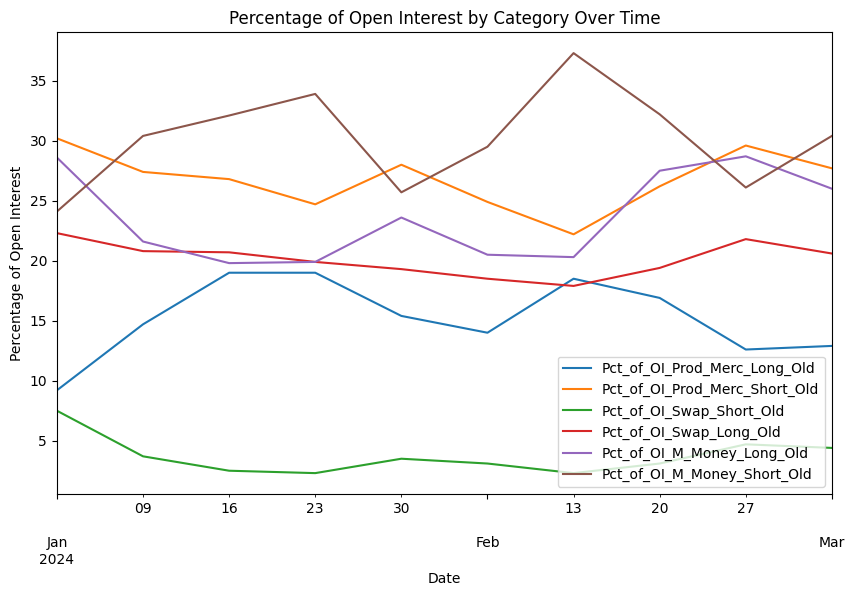

In [166]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already indexed by "Report_Date_as_YYYY-MM-DD" with datetime format
columns_to_plot = [
    'Pct_of_OI_Prod_Merc_Long_Old', 
    'Pct_of_OI_Prod_Merc_Short_Old',
    'Pct_of_OI_Swap_Short_Old', 
    'Pct_of_OI_Swap_Long_Old',
    'Pct_of_OI_M_Money_Long_Old', 
    'Pct_of_OI_M_Money_Short_Old'
]

# Plotting
ax = filtered_copper_df[columns_to_plot].plot(kind='line', figsize=(10, 6), title='Percentage of Open Interest by Category Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Percentage of Open Interest')

plt.show()



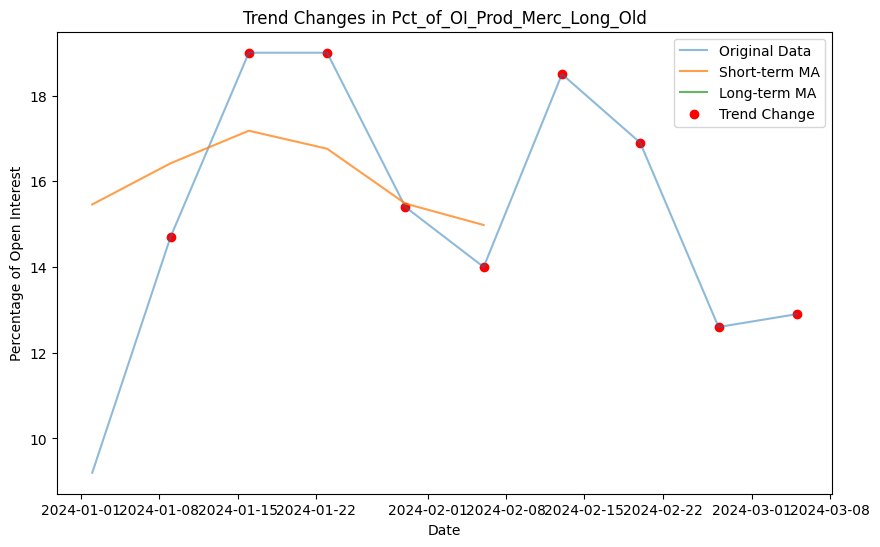

In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example column
column = 'Pct_of_OI_Prod_Merc_Long_Old'

# Calculate moving averages
filtered_copper_df['Short_MA'] = filtered_copper_df[column].rolling(window=5).mean()  # Short-term moving average (e.g., 5 days)
filtered_copper_df['Long_MA'] = filtered_copper_df[column].rolling(window=20).mean()  # Long-term moving average (e.g., 20 days)

# Plot the original data and moving averages
plt.figure(figsize=(10, 6))
plt.plot(filtered_copper_df.index, filtered_copper_df[column], label='Original Data', alpha=0.5)
plt.plot(filtered_copper_df.index, filtered_copper_df['Short_MA'], label='Short-term MA', alpha=0.75)
plt.plot(filtered_copper_df.index, filtered_copper_df['Long_MA'], label='Long-term MA', alpha=0.75)

# Identifying the crossing points
crossings = np.where(np.diff(np.sign(filtered_copper_df['Short_MA'] - filtered_copper_df['Long_MA'])))[0]
plt.scatter(filtered_copper_df.index[crossings], filtered_copper_df[column].iloc[crossings], color='red', label='Trend Change')

plt.xlabel('Date')
plt.ylabel('Percentage of Open Interest')
plt.title(f'Trend Changes in {column}')
plt.legend()
plt.show()
